####Importing the libraties

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
import math

####Importing the dataset

In [2]:
dataset = pd.read_csv('hospital.csv')

####Summarizing the dataset

In [3]:
dataset

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144.0,11-20
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699.0,31-40
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235.0,11-20
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,11-20,3761.0,11-20


In [4]:
for col in dataset.columns:
  print(dataset[col].value_counts())
  print("\n")

1         1
212290    1
212297    1
212296    1
212295    1
         ..
106146    1
106145    1
106144    1
106143    1
318438    1
Name: case_id, Length: 318438, dtype: int64


26    33076
23    26566
19    21219
6     20425
11    17328
14    17328
28    17137
27    14244
9     11510
29    11311
12    11297
32    10703
25     9834
10     9435
15     9257
21     8150
24     7992
3      7116
17     5501
5      5261
1      5249
13     5236
2      5102
30     5002
22     4277
31     3967
16     3671
8      3663
18     3630
20     1405
7      1306
4      1240
Name: Hospital_code, dtype: int64


a    143425
b     68946
c     45928
e     24770
d     20389
f     10703
g      4277
Name: Hospital_type_code, dtype: int64


1     55351
2     51809
6     46991
7     35463
3     31569
5     31105
9     26277
11    17137
4     13857
10     5249
13     3630
Name: City_Code_Hospital, dtype: int64


X    133336
Y    122428
Z     62674
Name: Hospital_region_code, dtype: int64


2     98311
4     91709
3

In [5]:
dataset.describe(include='all')

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
count,318438.000000,318438.000000,318438,318438.000000,318438,318438.000000,318438,318438,318438,318325.000000,318438.000000,313906.000000,318438,318438,318438.000000,318438,318438.000000,318438
unique,NaN,NaN,7,NaN,3,NaN,5,6,6,NaN,NaN,NaN,3,3,NaN,10,NaN,11
top,NaN,NaN,a,NaN,X,NaN,gynecology,R,F,NaN,NaN,NaN,Trauma,Moderate,NaN,41-50,NaN,21-30
freq,NaN,NaN,143425,NaN,133336,NaN,249486,127947,112753,NaN,NaN,NaN,152261,175843,NaN,63749,NaN,87491
mean,159219.500000,18.318841,NaN,4.771717,NaN,3.197627,NaN,NaN,NaN,2.625807,65747.579472,7.251859,NaN,NaN,3.284099,NaN,4880.749392,NaN
std,91925.276848,8.633755,NaN,3.102535,NaN,1.168171,NaN,NaN,NaN,0.873146,37979.936440,4.745266,NaN,NaN,1.764061,NaN,1086.776254,NaN
min,1.000000,1.000000,NaN,1.000000,NaN,0.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,NaN,NaN,0.000000,NaN,1800.000000,NaN
25%,79610.250000,11.000000,NaN,2.000000,NaN,2.000000,NaN,NaN,NaN,2.000000,32847.000000,4.000000,NaN,NaN,2.000000,NaN,4186.000000,NaN
50%,159219.500000,19.000000,NaN,5.000000,NaN,3.000000,NaN,NaN,NaN,3.000000,65724.500000,8.000000,NaN,NaN,3.000000,NaN,4741.000000,NaN
75%,238828.750000,26.000000,NaN,7.000000,NaN,4.000000,NaN,NaN,NaN,3.000000,98470.000000,8.000000,NaN,NaN,4.000000,NaN,5409.000000,NaN


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

####Drop the unnecessary attributes

In [7]:
dataset = dataset.drop(['case_id', 'Hospital_type_code', 'Hospital_region_code', 'Ward_Type'],axis=1)

####Handling the missing values

In [8]:
#Find the missing values
print('Number of missing values before handling:')
for col in dataset.columns:
    print('\t%s: %d' % (col, dataset[col].isna().sum()))

#Replace the missing values with mode
for column in ['Bed Grade', 'City_Code_Patient']:
    dataset[column].fillna(dataset[column].mode()[0], inplace=True)

print('Number of missing values after handling:')
for col in dataset.columns:
    print('\t%s: %d' % (col, dataset[col].isna().sum()))

Number of missing values before handling:
	Hospital_code: 0
	City_Code_Hospital: 0
	Available Extra Rooms in Hospital: 0
	Department: 0
	Ward_Facility_Code: 0
	Bed Grade: 113
	patientid: 0
	City_Code_Patient: 4532
	Type of Admission: 0
	Severity of Illness: 0
	Visitors with Patient: 0
	Age: 0
	Admission_Deposit: 0
	Stay: 0
Number of missing values after handling:
	Hospital_code: 0
	City_Code_Hospital: 0
	Available Extra Rooms in Hospital: 0
	Department: 0
	Ward_Facility_Code: 0
	Bed Grade: 0
	patientid: 0
	City_Code_Patient: 0
	Type of Admission: 0
	Severity of Illness: 0
	Visitors with Patient: 0
	Age: 0
	Admission_Deposit: 0
	Stay: 0


####Remove outliers if its value is greater than mean + 3 x standard deviation

In [9]:
print('Number of rows before discarding outliers = %d' % (dataset.shape[0]))
mean = np.mean(dataset, axis=0)
std = np.std(dataset, axis=0)
dataset = dataset[(dataset > (mean + 3 * std)).sum(axis=1) <= 0]
print('Number of rows after discarding missing values = %d' % (dataset.shape[0]))

Number of rows before discarding outliers = 318438


/home/eldestructo3/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/eldestructo3/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3613: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


Number of rows after discarding missing values = 297547


/tmp/ipykernel_143488/2722223936.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  dataset = dataset[(dataset > (mean + 3 * std)).sum(axis=1) <= 0]


In [10]:
dataset

,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,8,3,3,radiotherapy,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,5,2,radiotherapy,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,10,1,2,anesthesia,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,26,2,2,radiotherapy,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,26,2,2,radiotherapy,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318431,23,6,3,anesthesia,F,4.0,120672,2.0,Urgent,Extreme,2,71-80,4508.0,11-20
318434,24,1,2,anesthesia,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699.0,31-40
318435,7,4,3,gynecology,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235.0,11-20
318436,11,2,3,anesthesia,D,3.0,91081,8.0,Trauma,Minor,5,11-20,3761.0,11-20


####Segregate the dataset into X & y

In [11]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

####Encoding categorical data

In [12]:
#Encoding the Independent Variable
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3,4,8,9,11])], remainder='passthrough')
X = pd.DataFrame(ct.fit_transform(X))

#Encoding the Dependent Variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = pd.DataFrame(le.fit_transform(y))

####Splitting the dataset into the Training set and Test set

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

####Normalization

In [14]:
X_train = (X_train - X_train.mean()) / X_train.std()
X_test = (X_test - X_test.mean()) / X_test.std()

In [15]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
151197,-0.176001,-0.317554,0.522161,-0.312251,-0.061365,-0.307594,-0.351477,-0.358917,-0.437472,2.171504,...,-0.159645,-0.064197,-1.541212,-1.218988,-0.134666,-0.705685,0.018229,0.049733,-0.836761,0.455197
7861,5.681764,-0.317554,-1.915111,-0.312251,-0.061365,-0.307594,-0.351477,-0.358917,2.285852,-0.460508,...,-0.159645,-0.064197,0.890141,-0.896251,-1.078026,1.588688,1.409429,0.314223,-0.836761,0.361608
175100,-0.176001,-0.317554,0.522161,-0.312251,-0.061365,-0.307594,-0.351477,-0.358917,-0.437472,-0.460508,...,-0.159645,-0.064197,1.237477,-0.250777,-1.078026,0.441502,-1.14699,0.049733,0.633631,0.549803
83662,-0.176001,-0.317554,0.522161,-0.312251,-0.061365,-0.307594,-0.351477,-0.358917,-0.437472,2.171504,...,6.263863,-0.064197,-0.962318,-1.218988,-1.078026,0.441502,0.393329,0.314223,-0.836761,1.998389
113229,-0.176001,-0.317554,-1.915111,3.202539,-0.061365,3.251029,-0.351477,-0.358917,-0.437472,-0.460508,...,-0.159645,-0.064197,1.469034,-0.573514,0.808695,-0.705685,-0.325562,0.314223,-0.836761,0.168328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21440,-0.176001,-0.317554,-1.915111,3.202539,-0.061365,-0.307594,-0.351477,-0.358917,-0.437472,-0.460508,...,-0.159645,-0.064197,0.542805,0.394698,-1.078026,0.441502,-0.657635,2.165655,-0.836761,1.164231
117583,-0.176001,-0.317554,0.522161,-0.312251,-0.061365,-0.307594,-0.351477,-0.358917,2.285852,-0.460508,...,-0.159645,-0.064197,-0.84654,-0.896251,-0.134666,1.588688,-0.358503,0.578714,-0.836761,0.118482
73349,-0.176001,-0.317554,-1.915111,3.202539,-0.061365,-0.307594,-0.351477,-0.358917,-0.437472,-0.460508,...,-0.159645,-0.064197,1.121698,2.008383,0.808695,-0.705685,-1.067915,-1.272718,-0.836761,0.693237
267336,-0.176001,-0.317554,0.522161,-0.312251,-0.061365,-0.307594,-0.351477,-0.358917,-0.437472,-0.460508,...,-0.159645,-0.064197,-1.425433,0.394698,-1.078026,-0.705685,-0.120962,0.314223,-0.836761,1.097092


In [16]:
y_train

,0
151197,3
7861,3
175100,3
83662,2
113229,3
...,...
21440,2
117583,2
73349,2
267336,2


In [21]:
# class myNaiveBayes:

#     def __init__(self):
#         self.length = 0

#     def fit(self, X_train, y_train):
#         self.train_dict = {}
#         dataset = pd.concat([X_train, y_train], axis=1)
#         dataset = dataset.values
#         for i in range(len(dataset)):
#             sample = dataset[i]
#             prediction = sample[-1]
#             sample = sample[:-1]
#             for j in range(len(sample)):
#                 if prediction not in self.train_dict:
#                     self.train_dict[prediction] = {}
#                 if j not in self.train_dict[prediction]:
#                     self.train_dict[prediction][j] = {}
#                 if sample[j] not in self.train_dict[prediction][j]:
#                     self.train_dict[prediction][j][sample[j]] = 0
#                 self.train_dict[prediction][j][sample[j]] += 1
#         self.length = len(dataset)
        

#     def predict(self, X_test):
#         predictions = []
#         X_test = X_test.values.tolist()
#         for sample in X_test:
#             pred_prob = []
#             for prediction in range(1, len(self.train_dict) + 1):
#                 total_f = sum(self.train_dict[prediction][0].values())
#                 prob = 1;
#                 for feature in range(0, len(sample)):
#                     if sample[feature] not in self.train_dict[prediction][feature]:
#                         prob = 0
#                         break
#                     feature_occurences = self.train_dict[prediction][feature][sample[feature]] / total_f
#                     prob_feature_occurence = feature_occurences
#                     prob *= prob_feature_occurence
#                 prob *= total_f / self.length
#                 pred_prob.append(prob)
#             predictions.append(pred_prob.index(max(pred_prob)) + 1)
#         return predictions
def groupUnderClass(mydata):
      dict = {}
      for i in range(len(mydata)):
          if (mydata[i][-1] not in dict):
              dict[mydata[i][-1]] = []
          dict[mydata[i][-1]].append(mydata[i])
      return dict
 
 
# Calculating Mean
def mean(numbers):
    return sum(numbers) / float(len(numbers))
 
# Calculating Standard Deviation
def std_dev(numbers):
    avg = mean(numbers)
    variance = sum([pow(x - avg, 2) for x in numbers]) / float(len(numbers))
    return math.sqrt(variance)
 
def MeanAndStdDev(mydata):
    info = [(mean(attribute), std_dev(attribute)) for attribute in zip(*mydata)]
    # eg: list = [ [a, b, c], [m, n, o], [x, y, z]]
    # here mean of 1st attribute =(a + m+x), mean of 2nd attribute = (b + n+y)/3
    # delete summaries of last class
    del info[-1]
    return info
 
# find Mean and Standard Deviation under each class
def MeanAndStdDevForClass(mydata):
    info = {}
    dict = groupUnderClass(mydata)
    for classValue, instances in dict.items():
        info[classValue] = MeanAndStdDev(instances)
    return info
 
 
# Calculate Gaussian Probability Density Function
def calculateGaussianProbability(x, mean, stdev):
    expo = math.exp(-(math.pow(x - mean, 2) / (2 * math.pow(stdev, 2) + 1e-6)))
    return (1 / (math.sqrt(2 * math.pi) * stdev + 1e-6)) * expo
 
 
# Calculate Class Probabilities
def calculateClassProbabilities(info, test):
    probabilities = {}
    for classValue, classSummaries in info.items():
        probabilities[classValue] = 1
        for i in range(len(classSummaries)):
            mean, std_dev = classSummaries[i]
            x = test[i]
            probabilities[classValue] *= calculateGaussianProbability(x, mean, std_dev)
    return probabilities
 
 
# Make prediction - highest probability is the prediction
def predict(info, test):
    probabilities = calculateClassProbabilities(info, test)
    bestLabel, bestProb = None, -1
    for classValue, probability in probabilities.items():
        if bestLabel is None or probability > bestProb:
            bestProb = probability
            bestLabel = classValue
    return bestLabel
 
 
# returns predictions for a set of examples
def getPredictions(info, test):
    predictions = []
    for i in range(len(test)):
        result = predict(info, test[i])
        predictions.append(result)
    return predictions

info = MeanAndStdDevForClass(X_train.values.tolist())
predictions = getPredictions(info, X_test.values.tolist())
accuracy = accuracy_score(y_test, predictions)
print(accuracy)

####5-fold cross validation on the training set (train using Naive Bayes)

In [ ]:
from sklearn.naive_bayes import GaussianNB

def fiveFold(model, X_train, y_train):
  best_model = None
  # Assume X_train and y_train are the feature and label arrays of the training set
  kf = KFold(n_splits=5, shuffle=True, random_state=42)

  # Initialize an empty list to store the accuracy scores
  accuracy_scores = []

  for train_index, val_index in kf.split(X_train):
      # Train the classifier on the training set
      X_split_train, X_split_val = X_train.iloc[train_index], X_train.iloc[val_index]
      y_split_train, y_split_val = y_train.iloc[train_index], y_train.iloc[val_index]
      model.fit(X_split_train, y_split_train)
      
      # Compute the accuracy on the validation set
      y_pred = model.predict(X_split_val)
      accuracy = accuracy_score(y_split_val, y_pred)
      accuracy_scores.append(accuracy)
      if best_model == None or accuracy > best_model[0]:
          best_model = (accuracy, model)

fiveFold(myNaiveBayes(), X_train, y_train)

KeyError: 11

In [ ]:
dataset

####Apply PCA by preserving 95% of total variance. Plot the graph for and trained model using Naive Bayes. Computed 5-fold cross validation on the training set.

[0.06589169 0.05916542 0.05364992 0.05258821 0.04467833 0.04238067
 0.0392371  0.03644011 0.03576314 0.03492956 0.03423115 0.03303306
 0.03268191 0.03224033 0.03137001 0.03014722 0.03011282 0.02953011
 0.02901069 0.02875435 0.02847756 0.02825203 0.02803155 0.02718022
 0.02592173 0.02251289 0.02184675]


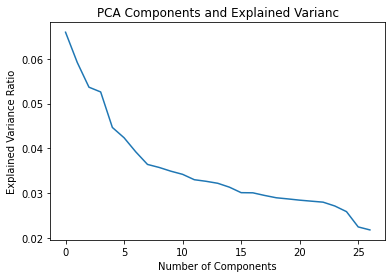

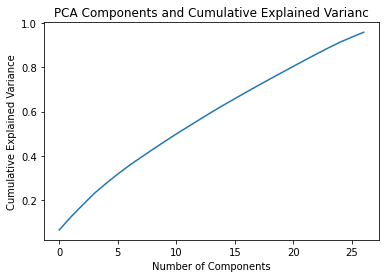

TypeError: If no scoring is specified, the estimator passed should have a 'score' method. The estimator <__main__.myNaiveBayes object at 0x7f4e8542a8c0> does not.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Apply PCA to preserve 95% of the total variance
pca = PCA(n_components=0.95)
pca_features = pca.fit_transform(X_train)

# Plot the explained variance by each component
print(pca.explained_variance_ratio_)
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Components and Explained Varianc')
plt.show()

# Plot the cumulative explained variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Components and Cumulative Explained Varianc')
plt.show()

# Train a Naive Bayes model using the features extracted from PCA
model = myNaiveBayes()
scores = cross_val_score(model, pca_features, y_train.values.ravel(), cv=5)
print('Final test accuracy:', scores.mean())